In [1]:
%matplotlib inline

import pylab as pl
import numpy as np

In [2]:
data_sample_early_cam1 = np.load('./cam1/000004600.npy')
data_sample_late_cam1 = np.load('./cam1/000016721.npy')
data_sample_early_cam2 = np.load('./cam2/000004600.npy')
data_sample_late_cam2 = np.load('./cam2/000016721.npy')

In [3]:
print(np.shape(data_sample_early_cam1))

(216, 409, 25)


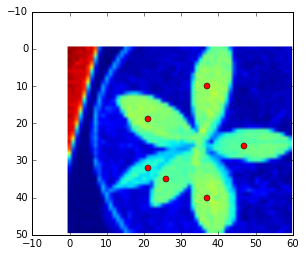

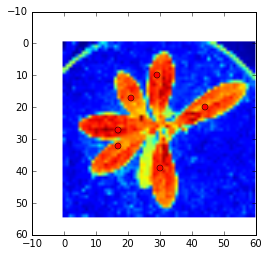

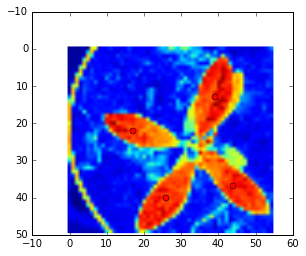

In [4]:
pl.imshow(data_sample_early_cam1[85:135,65:125,0])
pl.plot([21,21,26,37,37,47],[19,32,35,40,10,26],'ro')
pl.show()
pl.imshow(data_sample_early_cam1[90:145,175:235,0])
pl.plot([21,17,30,44,29,17],[17,32,39,20,10,27],'ro')
pl.show()
pl.imshow(data_sample_early_cam1[125:175,255:310,0])
pl.plot([17,44,39,26],[22,37,13,40],'ro')
pl.show()
absolute_x = [85+21,85+21,85+26,85+37,85+37,85+47,90+21,90+17,90+30,90+44,90+29,90+17,125+17,125+44,125+39,125+26]
absolute_y = [65+19,65+32,65+35,65+40,65+10,65+26,175+17,175+32,175+39,175+20,175+10,175+27,255+22,255+37,255+13,255+40]


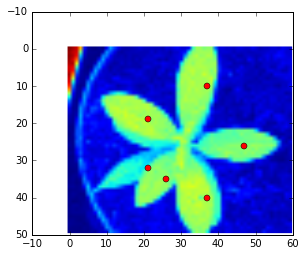

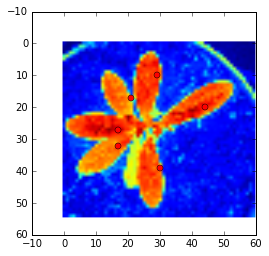

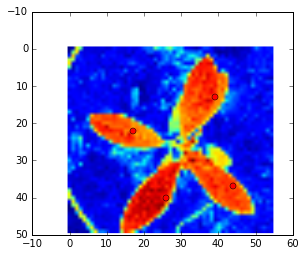

In [5]:
# Opgelet: er is ongeveer een verschuiving van 3 pixels
pl.imshow(data_sample_late_cam1[85:135,65:125,0])
pl.plot([21,21,26,37,37,47],[19,32,35,40,10,26],'ro')
pl.show()
pl.imshow(data_sample_late_cam1[90:145,175:235,0])
pl.plot([21,17,30,44,29,17],[17,32,39,20,10,27],'ro')
pl.show()
pl.imshow(data_sample_late_cam1[125:175,255:310,0])
pl.plot([17,44,39,26],[22,37,13,40],'ro')
pl.show()

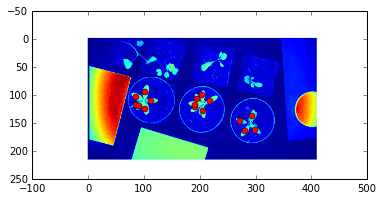

In [6]:
absolute_x = [65+21,65+21,65+26,65+37,65+37,65+47,175+21,175+17,175+30,175+44,175+29,175+17,255+17,255+44,255+39,255+26]
absolute_y = [85+19,85+32,85+35,85+40,85+10,85+26,90+17,90+32,90+39,90+20,90+10,90+27,125+22,125+37,125+13,125+40]
pl.imshow(data_sample_early_cam1[:,:,0])
pl.plot(absolute_x,absolute_y,'ro')
pl.show()

In [7]:
absolute_x = [65+21,65+21,65+26,65+37,65+37,65+47,175+21,175+17,175+30,175+44,175+29,175+17,255+17,255+44,255+39,255+26]
absolute_y = [85+19,85+32,85+35,85+40,85+10,85+26,90+17,90+32,90+39,90+20,90+10,90+27,125+22,125+37,125+13,125+40]
no_frequencies = 25
no_points = np.shape(absolute_x)[0]

import os
# STEP 0: get number of npy-files
no_files = 0
for filename in os.listdir(os.getcwd()+'/cam1/'):
    if (filename.rfind('.npy')>0) and (filename.find('000') == 0):
        # print filename
        no_files = no_files + 1

# STEP 1: initialise a np-array of the appropriate size
data_cam1 = np.zeros((no_files,no_points,no_frequencies))

# STEP 2: read each image and save it to array
cnt = 0
for filename in os.listdir(os.getcwd()+'/cam1/'):
    if (filename.rfind('.npy')>0) and (filename.find('000') == 0):
        tmp = np.load('./cam1/'+filename)
        data_cam1[cnt,:,:] = tmp[absolute_y,absolute_x,:]
        cnt = cnt + 1
# np.save('data_cam1.npy_LOCAL','data_cam1')

In [13]:
data_cam1 = np.load('data_cam1.npy')

In [14]:
np.shape(data_cam1)

(16727, 16, 25)

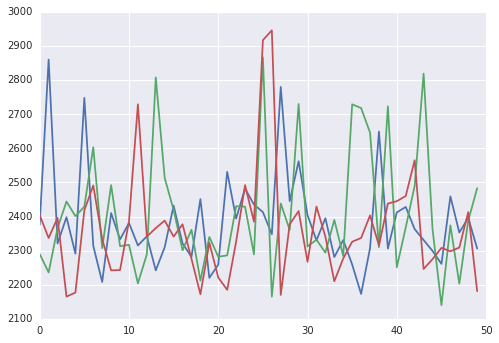

In [45]:
pl.plot(data_cam1[2000:2050,13,15])
pl.plot(data_cam1[5000:5050,13,15])
pl.plot(data_cam1[15000:15050,13,15])
pl.show()

In [ ]:
# RESHAPE cam1 data to time x features (features = spectral bands times points on plants)
# get data cam 2 and do the same

22416
(22416, 4)


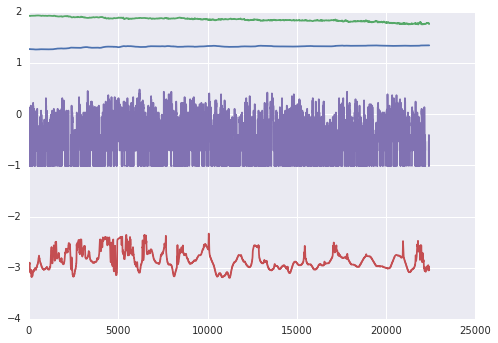

In [76]:
# Acquire targets (environmental characteristics)
# plot etc...
#targets = np.loadtxt('EnvironmentalData.txt')
f_targets = open('EnvironmentalData.txt')
no_targets = 0
for line in f_targets:
    no_targets = no_targets + 1

print no_targets

f_targets = open('EnvironmentalData.txt')
targets = np.zeros((no_targets,4)) # 4 = number of environmental characteristics
cnt = 0
for line in f_targets:
    targets[cnt,0] = np.float(line.split()[1])
    targets[cnt,1] = np.float(line.split()[2])
    targets[cnt,2] = np.float(line.split()[3])
    targets[cnt,3] = np.float(line.split()[4])
    cnt = cnt + 1
    
#targets = targets.values
print np.shape(targets)
pl.plot(np.log10(targets))


In [ ]:
# do ridge regression and ELM stuff and delay line stuff + all combo's

# GET ALSO REFERENCE POINTS THAT ARE NOT ON THE PLANTS!

In [42]:
import seaborn as sb
from sklearn import linear_model
import pandas as pd

/Library/Python/2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
